# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [28]:
df = pd.read_csv('marketing_campaign_data.csv')
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
195,195,7224,1977,S1,Menikah,31353000.0,1,1,29-12-2013,24,...,8,0,0,0,0,0,0,3,11,0
186,186,5823,1970,S3,Lajang,32303000.0,0,1,08-03-2014,63,...,5,0,0,0,0,0,0,3,11,0
2149,2149,10609,1962,S3,Menikah,42769000.0,0,1,12-10-2013,15,...,4,0,0,0,0,0,0,3,11,0
802,802,236,1951,S1,Menikah,34838000.0,1,1,19-01-2013,62,...,6,0,0,0,0,0,0,3,11,0
1198,1198,5545,1972,S3,Menikah,78075000.0,0,0,05-04-2014,72,...,1,0,0,0,0,0,0,3,11,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [30]:
df= df.drop(['Unnamed: 0'], axis = 1)

In [31]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
missing_value_df

,column_name,sum_missing,percent_missing
0,ID,0,0.00
1,Year_Birth,0,0.00
2,Education,0,0.00
3,Marital_Status,0,0.00
4,Income,24,1.07
5,Kidhome,0,0.00
6,Teenhome,0,0.00
7,Dt_Customer,0,0.00
8,Recency,0,0.00
9,MntCoke,0,0.00


In [32]:
df1 = df.copy()
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntCoke              2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

#### Feature Engineering

In [33]:
df1['age'] = 2023 - df1['Year_Birth']

In [43]:
age_cat = []
for x in df1['age']:
    if x < 27:
        age_cat.append('Gen Z')
    elif x < 43:
        age_cat.append('Gen Y')
    elif x < 59:
        age_cat.append('Gen X')
    elif x < 78:
        age_cat.append('Baby Boomers')
    else :
        age_cat.append('Pre Boomer')

df1['age_cat'] = age_cat

In [123]:
df1['total_children'] = df1['Kidhome'] + df1['Teenhome']
df1['spendings'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']
df1['total_purchases'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']
df1['acc_campaign'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5'] + df1['Response']
df1['conversion_rate'] = round(df1['total_purchase'] / df1['NumWebVisitsMonth'],2)

In [136]:
df1['Marital_Status'] = df1['Marital_Status'].replace({'Janda':'Cerai','Duda':'Cerai'})
df1['family_members'] = df1['Marital_Status'].replace({'Menikah':2,'Bertunangan':1, 'Lajang':1, 'Cerai':1}) + df1['total_children']
df1['is_parent'] = np.where(df1.total_children > 0, 1, 0)

In [125]:
redundant = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID', 'Kidhome','Teenhome',
            'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain',
            'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
            'MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df2 = df1.drop(redundant, axis=1)

In [126]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.00,68522000.0,666666000.0
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,24.00,49.00,74.0,99.0
NumWebVisitsMonth,2216.0,5.319043e+00,2.425359e+00,0.0,3.00,6.00,7.0,20.0
age,2216.0,5.417960e+01,1.198555e+01,27.0,46.00,53.00,64.0,130.0
total_children,2216.0,9.472022e-01,7.490619e-01,0.0,0.00,1.00,1.0,3.0
spendings,2216.0,6.070754e+05,6.029005e+05,5000.0,69000.00,396500.00,1048000.0,2525000.0
total_purchase,2216.0,1.488087e+01,7.670957e+00,0.0,8.00,15.00,21.0,44.0
acc_campaign,2216.0,4.485560e-01,8.924401e-01,0.0,0.00,0.00,1.0,5.0
conversion_rate,2214.0,inf,NaN,0.0,1.25,2.67,5.5,inf
transactions,2216.0,6.070754e+05,6.029005e+05,5000.0,69000.00,396500.00,1048000.0,2525000.0


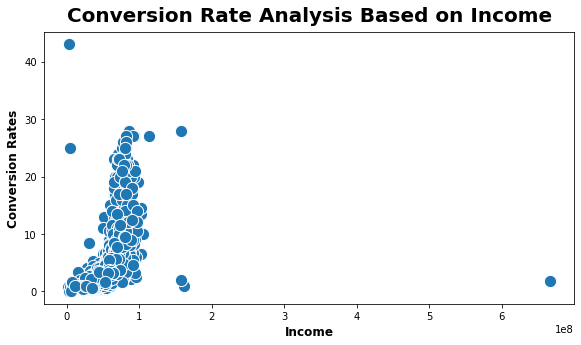

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(9.5,5))
sns.regplot(x=df2['Income'], y=df2['conversion_rate'],ci=None, scatter=False)
sns.scatterplot(x=df2['Income'], y=df2['conversion_rate'],s=150)
plt.text(x=2, y=47, s="Conversion Rate Analysis Based on Income", fontsize=20, weight='bold')
plt.xlabel("Income", fontsize=12, weight='bold')
plt.ylabel("Conversion Rates", fontsize=12, weight='bold')
plt.show()

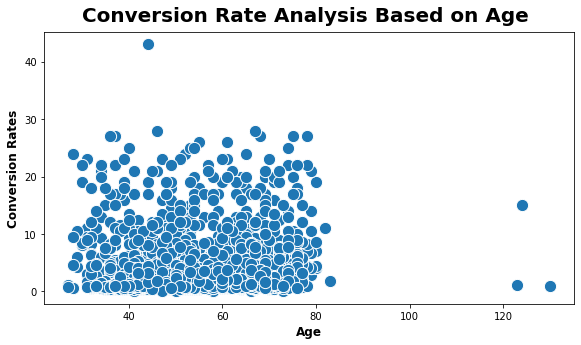

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(9.5,5))
sns.regplot(x=df2['age'], y=df2['conversion_rate'],ci=None, scatter=False)
sns.scatterplot(x=df2['age'], y=df2['conversion_rate'],s=150)
plt.text(x=30, y=47, s="Conversion Rate Analysis Based on Age", fontsize=20, weight='bold')
plt.xlabel("Age", fontsize=12, weight='bold')
plt.ylabel("Conversion Rates", fontsize=12, weight='bold')
plt.show()

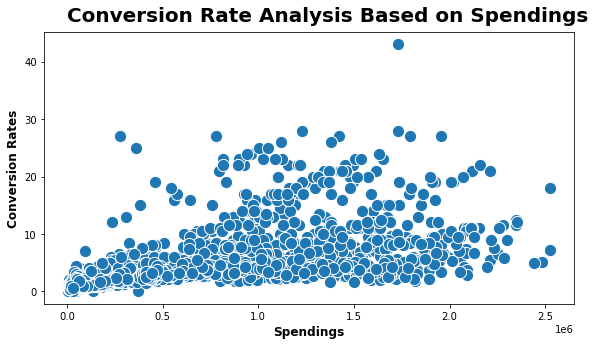

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(9.5,5))
sns.regplot(x=df2['spendings'], y=df2['conversion_rate'],ci=None, scatter=False)
sns.scatterplot(x=df2['spendings'], y=df2['conversion_rate'],s=150)
plt.text(x=30, y=47, s="Conversion Rate Analysis Based on Spendings", fontsize=20, weight='bold')
plt.xlabel("Spendings", fontsize=12, weight='bold')
plt.ylabel("Conversion Rates", fontsize=12, weight='bold')
plt.show()

Text(0.5, 1.0, 'Feature Correlation')

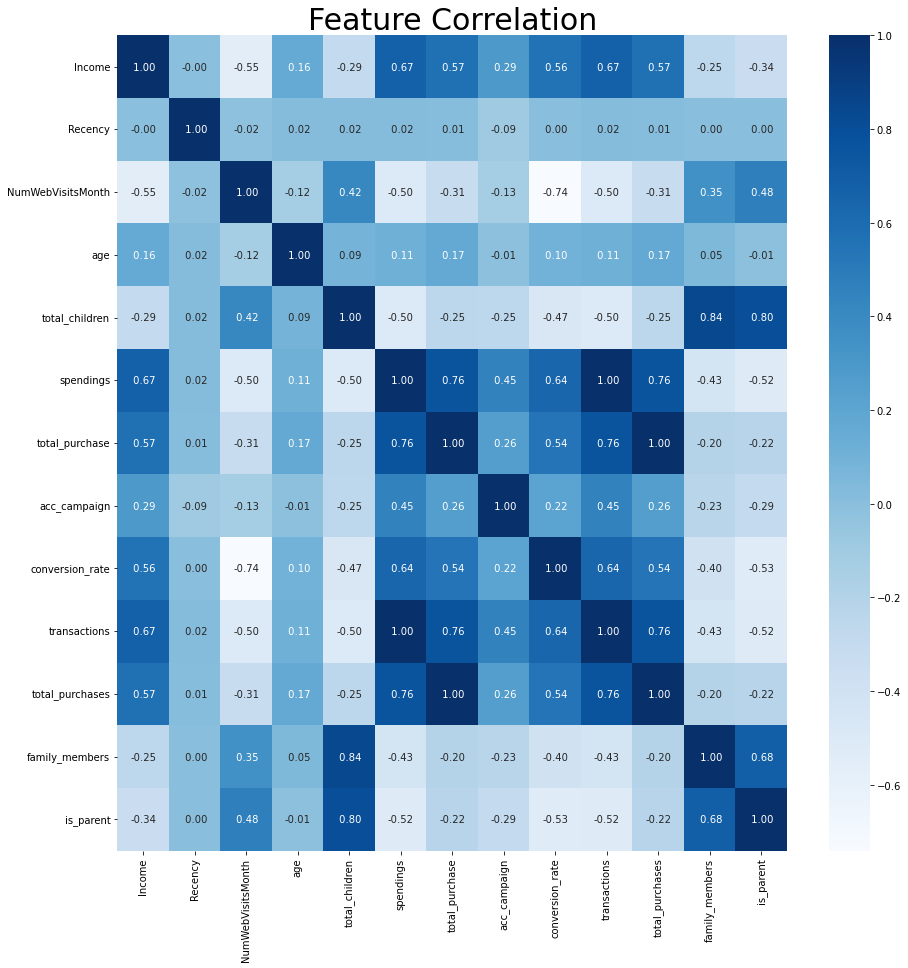

In [87]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), cmap='Blues', annot=True, fmt=' .2f')
plt.title('Feature Correlation', fontsize= 30)